<a href="https://colab.research.google.com/github/EddyGiusepe/Pytorch_to_Speech_to_Text/blob/main/Automatic_Speech_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align="center">Testando o modelo Pré-Treinado de Speech Recognition de SpeechBrain</h2>


Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

## Instalamos o SpeechBrain e outras Bibliotecas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install speechbrain
!pip install transformers
!pip install pydub
!pip install librosa

In [3]:
import time
from time import perf_counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Importamos os Modelo do SpeechBrain para ASR

### [asr-crdnn-transformerlm-librispeech](https://huggingface.co/speechbrain/asr-crdnn-transformerlm-librispeech)


CRDNN with CTC/Attention and RNNLM trained on LibriSpeech

Modelo CRDNN + TransformerLM, test_acc = 2.91%

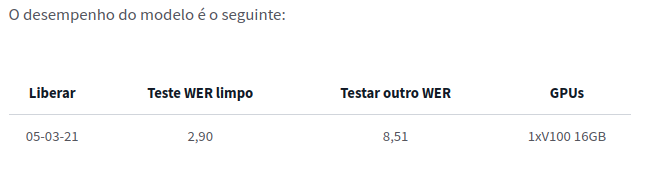

In [4]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-transformerlm-librispeech", savedir="/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/3_examples_of_Speech_Processing/Modelo_pre_treinado_ASR/pretrained_model_Transformers/asr-crdnn-transformerlm-librispeech")


/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:43: FutureWarning: Pass library_name=False as keyword args. From version 0.7 passing these as positional arguments will result in an error
  FutureWarning,


Downloading:   0%|          | 0.00/5.39k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/381M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/324k [00:00<?, ?B/s]

In [5]:
# Aqui visualizamos os texto transcrito pelo Modelo

audio_file = "/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/2_SpeechBrain/speechbrain/samples/audio_samples/example5.wav"

asr_model.transcribe_file(audio_file)

'THE FROSTY AIR PASSED THROUGH THE COAT'

In [6]:
# O áudio é:

from speechbrain.dataio.dataio import read_audio
from IPython.display import Audio
signal = read_audio(audio_file ).squeeze()
Audio(signal, rate=16000)

## [asr-crdnn-rnnlm-librispeech](https://huggingface.co/speechbrain/asr-crdnn-rnnlm-librispeech)


CRDNN with CTC/Attention and RNNLM trained on LibriSpeech


Modelo CRDNN, teste_acc = 3,09%


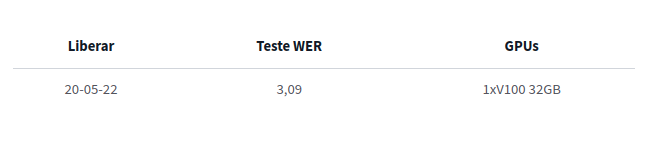

In [8]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model_RNN = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-rnnlm-librispeech", savedir="/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/3_examples_of_Speech_Processing/Modelo_pre_treinado_ASR/pretrained_model_RNN/asr-crdnn-rnnlm-librispeech")



/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:43: FutureWarning: Pass library_name=False as keyword args. From version 0.7 passing these as positional arguments will result in an error
  FutureWarning,


Downloading:   0%|          | 0.00/4.49k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/212M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/253k [00:00<?, ?B/s]

In [9]:
# Escolhemos um áudio para testar este modelo pré-treinado de RNN 

audio_file_RNN = "/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/2_SpeechBrain/speechbrain/samples/audio_samples/example1.wav"
asr_model_RNN.transcribe_file(audio_file_RNN)

'THE BIRCH CANOE SLID ON THE SMOOTH PLANKS'

In [10]:
from speechbrain.dataio.dataio import read_audio
from IPython.display import Audio

signal = read_audio(audio_file_RNN).squeeze()
Audio(signal, rate=16000)

## [asr-transformer-transformerlm-librispeech]()

Transformer for LibriSpeech (with Transformer LM)

Transformer + TransformerLM, test_acc = 2,26%


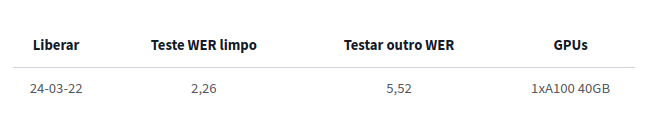

In [11]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model_transf_transf = EncoderDecoderASR.from_hparams(source="speechbrain/asr-transformer-transformerlm-librispeech", savedir="/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/3_examples_of_Speech_Processing/Modelo_pre_treinado_ASR/pretrained_model_Transf_transf/asr-transformer-transformerlm-librispeech")


/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:43: FutureWarning: Pass library_name=False as keyword args. From version 0.7 passing these as positional arguments will result in an error
  FutureWarning,


Downloading:   0%|          | 0.00/4.66k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/291M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/381M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/324k [00:00<?, ?B/s]

In [12]:
# Escolhemos um áudio para testar este modelo pré-treinado de transformer-transformerlm

audio_file_transf_transf = "/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/2_SpeechBrain/speechbrain/samples/audio_samples/example5.wav"
asr_model_transf_transf.transcribe_file(audio_file_transf_transf)

'THE FROSTY AIR PASSED THROUGH THE COAT'

In [13]:
from speechbrain.dataio.dataio import read_audio
from IPython.display import Audio

signal = read_audio(audio_file_transf_transf).squeeze()
Audio(signal, rate=16000)

# Testando alguns áudios com os Modelos instanciados acima (Previsão de Texto)

## Testando um áudio com o modelo: ``Modelo CRDNN + TransformerLM``

In [20]:
t0 = perf_counter()

audio_file_1 = "/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/2_SpeechBrain/speechbrain/samples/audio_samples/example2.flac"

Text_transcription_1 = asr_model.transcribe_file(audio_file_1)


tf = perf_counter()

time_interval = tf - t0
print(time_interval)


22.409112628999992


In [21]:
# A transcrição é:

print(Text_transcription_1)

MY FATHER HAS REVEALED THE CULPRIT'S NAME


In [22]:
# Escutemos o áudio transcrito

signal = read_audio(audio_file_1).squeeze()
Audio(signal, rate=16000)

## Testando um áudio com o modelo: ``asr-crdnn-rnnlm-librispeech``

In [23]:
t0 = perf_counter()

audio_file_2 = "/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/2_SpeechBrain/speechbrain/samples/audio_samples/example2.flac"

Text_transcription_2 = asr_model_RNN.transcribe_file(audio_file_2)


tf = perf_counter()

time_interval = tf - t0
print(time_interval)

2.502838286000042


In [24]:
# A transcrição é:

print(Text_transcription_2)

MY FATHER HAS REVEALED THE CULPRIT'S NAME


In [25]:
# Escutemos o áudio transcrito

signal = read_audio(audio_file_2).squeeze()
Audio(signal, rate=16000)

## Testando um áudio com o modelo: ``asr-transformer-transformerlm-librispeech``

In [26]:
t0 = perf_counter()

audio_file_3 = "/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/2_SpeechBrain/speechbrain/samples/audio_samples/example2.flac"

Text_transcription_3 = asr_model_transf_transf.transcribe_file(audio_file_3)


tf = perf_counter()

time_interval = tf - t0
print(time_interval)

25.138571833000242


In [27]:
# A transcrição é:

print(Text_transcription_3)

MY FATHER HAS REVEALED THE CULPRIT'S NAME


In [28]:
# Escutemos o áudio transcrito

signal = read_audio(audio_file_3).squeeze()
Audio(signal, rate=16000)

## <font color="orange">Observação</font>

Tem estudos na qual demostram que usar o modelo ``asr-crdnn-rnnlm-librispeech`` para **ASR** em comparação aos outros modelos pré-treinados, tem melhor desempenho. ``Por exemplo:`` para obter a transcrição de um áudio de $30$ segundos, este modelo demorou $1.14$ minutos.  